In [53]:
# importing all required packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble, preprocessing, tree
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from yellowbrick.model_selection import LearningCurve

In [54]:
# Machine Learning model created in this notebook should answer to this particular question:
# Based on the passangers' characteristics, what are the chances of survivng the catastrophe?
# The question above respresents classification problem which should predict one of two possible outcomes:
# The passanger will survive the catastrophe or the passanger will not survive the catastrophe.

In [55]:
# downloading the dataset
# the xls file was downloaded on https://biostat.app.vumc.org/wiki/Main/DataSets
df = pd.read_excel('titanic.xls')
orig_df = df

# the DataFrame contains the following columns:
# pclass - class (1 - first, 2 - second, 3 - third)
# survived - the passanger survived (0 - no, 1 - yes)
# name - name and surname
# sex - sex (male, female)
# age - age
# sibsp - accompanying wife / husband or number of twins
# parch - number of accompanying children / parents
# ticket - ticket number
# fare - ticket price
# cabin - cabin number
# embarked - place of embarkation (C - Cherbourg, Q - Queenstown, S - Southampton)
# boat - lifeboat number
# body - corpse ID
# home.dest - place of residence / destination

In [56]:
# data cleaning

# library pandas_profiling allows me to generate report with data profile
import pandas_profiling
pandas_profiling.ProfileReport(df)

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated with the `pandas-profiling` Python package"><meta name=author content="Simon Brugman and the open source community."><meta name=generator content="Pandas Profiling v3.2.0"><meta name=url content=https://github.com/pandas-profiling/pandas-profiling><meta name=date content="2022-07-17 10:06:10.884231"><title>Pandas Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regular.woff2) forma

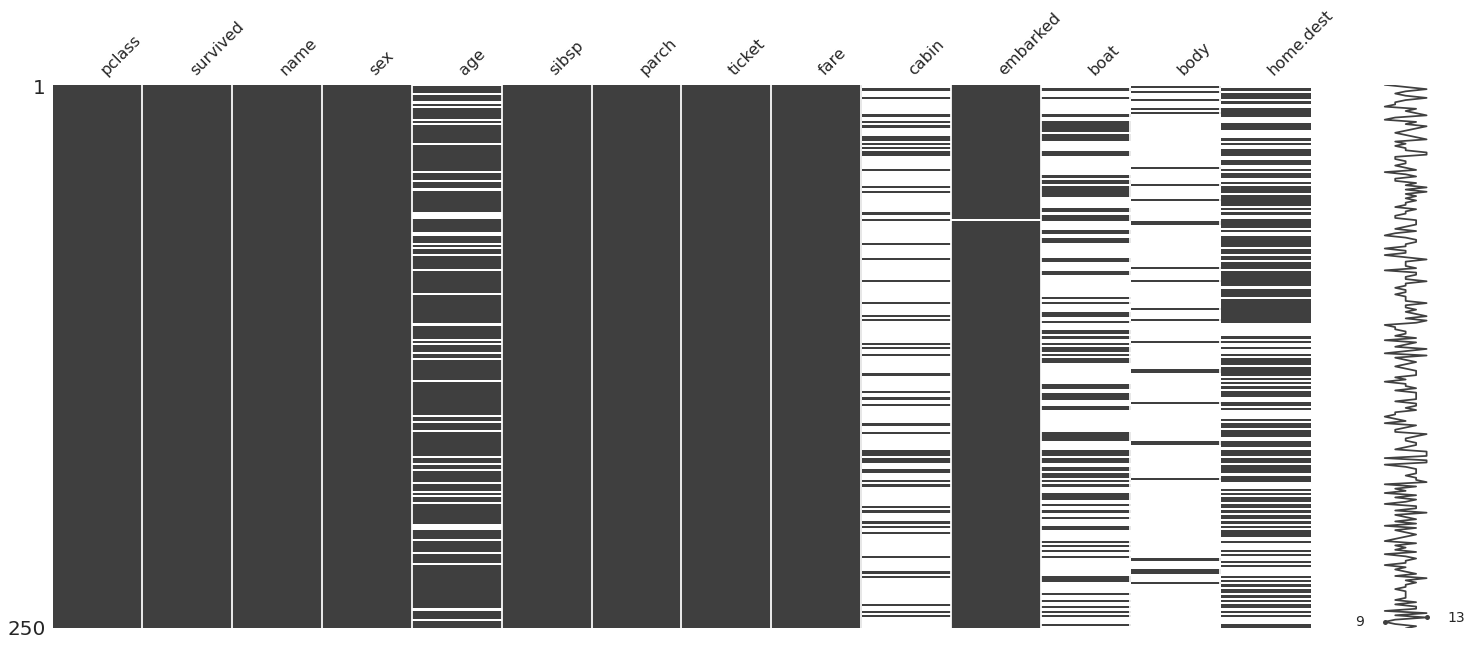

In [57]:
# deficiencies can be visualized using the missingno library. It illustrates contiguous blank areas so that 
# you can tell if the gaps are random. To see the data more accurately you can limit the number of tested samples

import missingno as msno
%matplotlib inline
ax = msno.matrix(orig_df.sample(250))

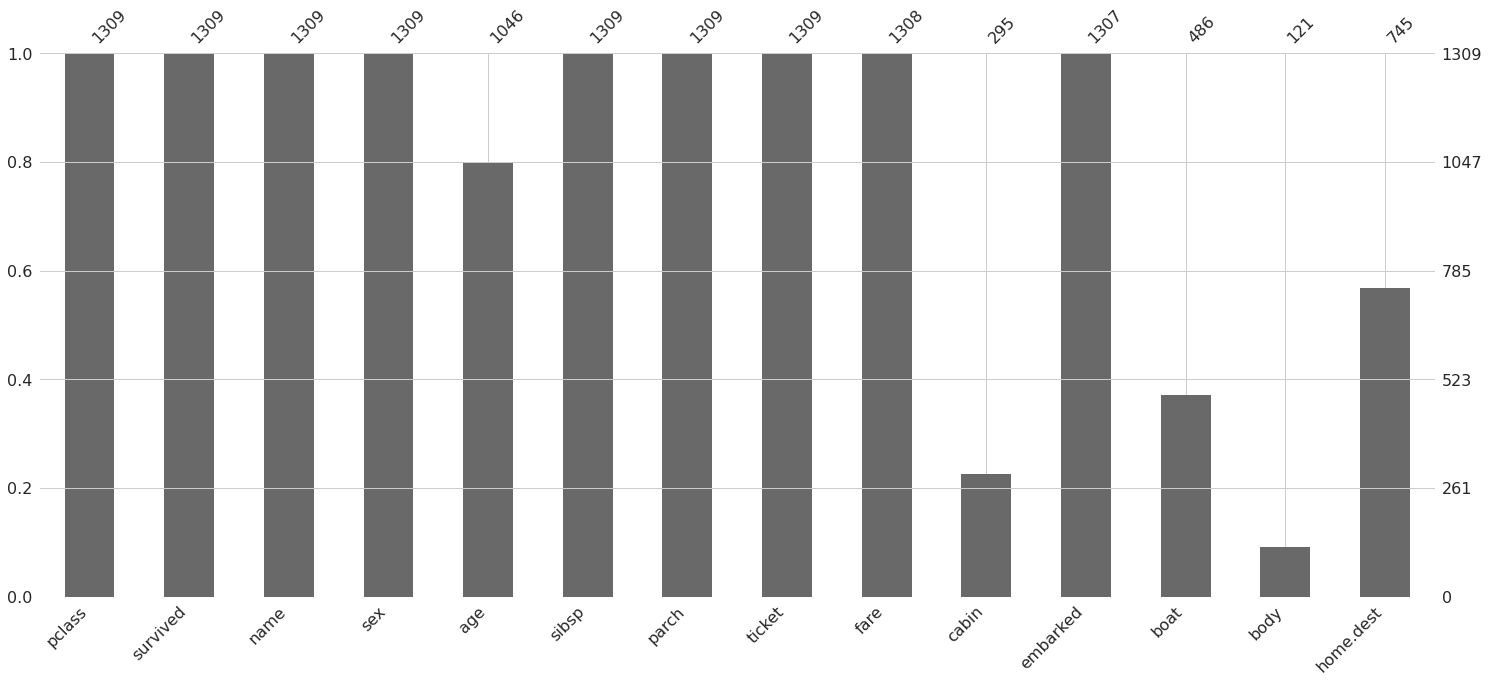

In [58]:
# msno.bar is a simple visualization of nullity by column

ax = msno.bar(orig_df)

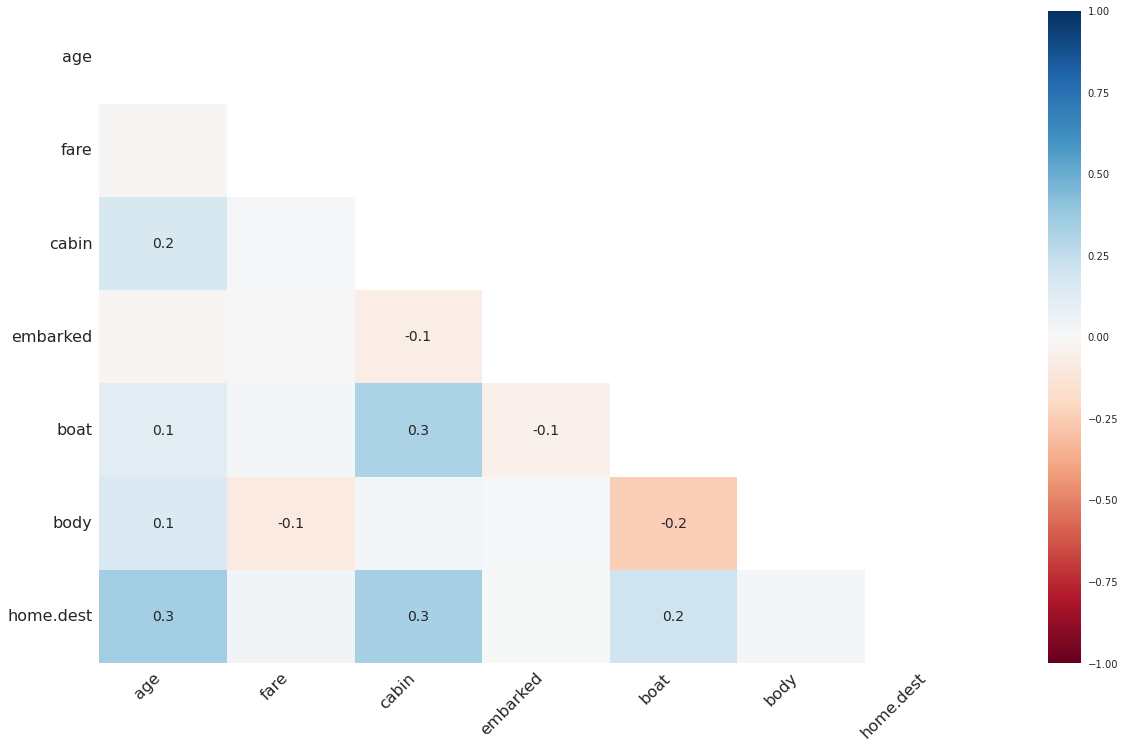

In [59]:
# The missingno correlation heatmap measures nullity correlation: 
# how strongly the presence or absence of one variable affects the presence of another:

ax = msno.heatmap(df)

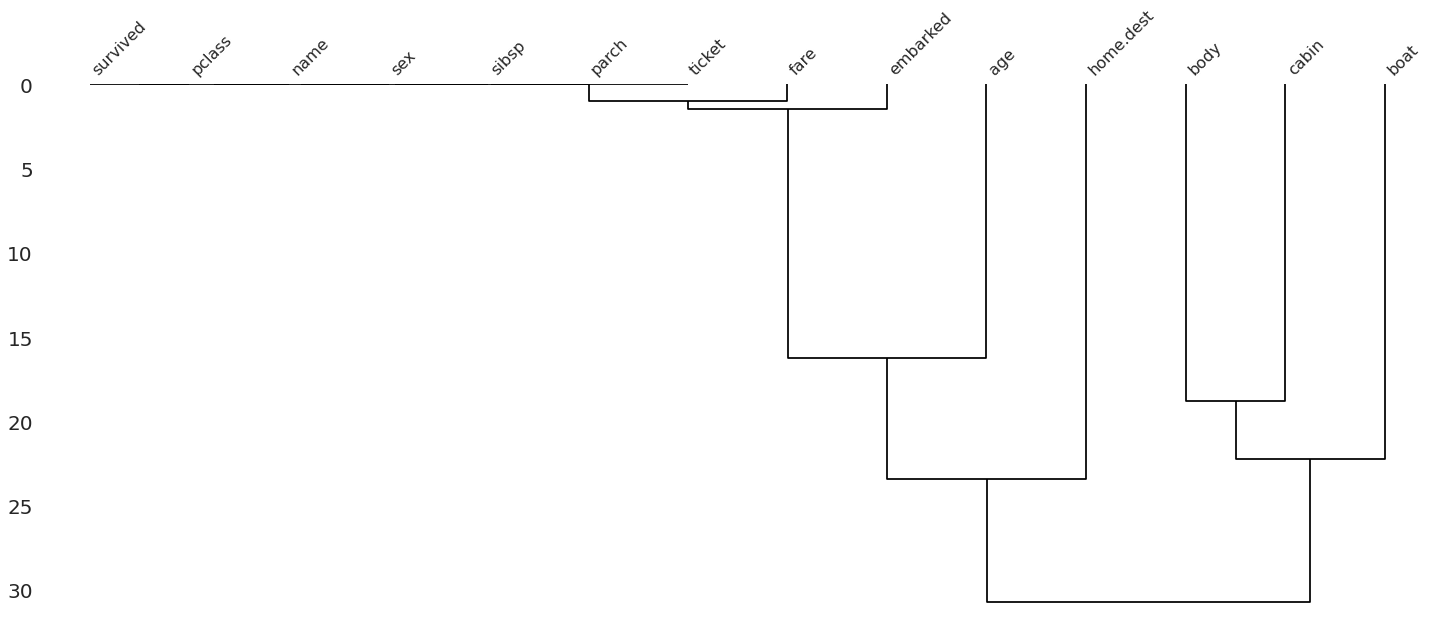

In [60]:
# the dendrogram allows me to more fully correlate variable completion, 
# revealing trends deeper than the pairwise ones visible in the correlation heatmap:

ax = msno.dendrogram(df)

In [61]:
# verifying missing values

# age column is important and may provide me relevant information
# however boat, cabin and body columns probably does not contain important information and can be omitted
# furthermore, the body and boat column causes a leakage of data about people who did & did not survive the catastrophe, 
# therefore they should definitely be removed to not falsify the model

# missing data will be replaced in imputation part

In [62]:
# in this case there is no need to parse the text columns, therefore the name and home.dest columns will be removed
# the ticket column also does not provide the information needed in the model, therefore it will also be removed

df = df.drop(columns=['name', 'ticket', 'home.dest', 'boat', 'body', 'cabin'])

In [63]:
# for columns containing text data (sex and embarked) I will create auxiliary columns with get_dummies method

df = pd.get_dummies(df)
print(df.columns)

df = df.drop(columns=['sex_male', 'embarked_C'])
print(df.columns)

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')
Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'embarked_Q', 'embarked_S'],
      dtype='object')


In [64]:
# now I am able to create X and y 
y = df.survived
X = df.drop(columns='survived')

In [65]:
# each model should be trained and tested on different data in order to 
# verify how well the model interprets the previously unknown data.

# in this example, 70% of the data will be training data and 30% of the data will be test data
# additionally, I will use the random_state = 42 argument to remove the random factor so that I can compare different data models

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# model imputation with impute function

from sklearn.experimental import enable_iterative_imputer
from sklearn import impute

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female']

imputer = impute.IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])

X_train.loc[:, num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:, num_cols] = imputed

In [70]:
# normalisation
# Normalization is the transformation of data so that the mean value is zero and the standard deviation is equal to one. 
# As a result, large values are not treated as more important than lower values.

cols = 'pclass, age, sibsp, fare'.split(',')
sca = preprocessing.StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

In [71]:
# code refactoring

def tweak_titanic(df):
    df = df.drop(
        columns = [
            'name',
            'ticket',
            'home.dest',
            'boat',
            'body',
            'cabin',
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
        df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        'pclass',
        'age',
        'sibsp',
        'parch',
        'fare',
    ]
    fi = impute.IterativeImputer()
    X_train.loc[
            :, num_cols
    ] = fi.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols] = fi.transform(
        X_test[num_cols]
    )
    if std_cols:
        std = preprocessing.StandardScaler()
        X_train.loc[
                :, std_cols
        ] = std.fit_transform(
            X_train[std_cols]
        )
        X_test.loc[
                :, std_cols
        ] = std.transform(X_test[std_cols])
    return X_train, X_test, y_train, y_test
ti_df = tweak_titanic(orig_df)
# std_cols = 'pclass', 'age', 'sibsp', 'fare'.split(',')
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, 'survived'#, std_cols=std_cols
)

In [72]:
# Reference model
# reference to compare different models

from sklearn.dummy import DummyClassifier

bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test)
print(bm.score(X_test, y_test))

0.5699745547073791


In [73]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost

for model in [DummyClassifier, LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, 
              GaussianNB, SVC, RandomForestClassifier, xgboost.XGBClassifier]:
    cls = model()
    kfold = model_selection.KFold(
        n_splits = 10)
    s = model_selection.cross_val_score(
        cls, X, y, scoring = "roc_auc", cv = kfold)
    print(f"{model.__name__:22} AUC: " 
          f"{s.mean():.3f} STD: {s.std():.2f}")

DummyClassifier        AUC: 0.500 STD: 0.00
LogisticRegression     AUC: 0.842 STD: 0.03
DecisionTreeClassifier AUC: 0.765 STD: 0.03
KNeighborsClassifier   AUC: 0.723 STD: 0.04
GaussianNB             AUC: 0.817 STD: 0.04
SVC                    AUC: 0.746 STD: 0.03
RandomForestClassifier AUC: 0.847 STD: 0.03
[10:19:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [76]:
# Model Contamination 
from mlxtend.classifier import (StackingClassifier)

clfs = [
    x() 
    for x in [
           LogisticRegression,
           DecisionTreeClassifier,
           KNeighborsClassifier,
           GaussianNB, 
           SVC, 
           RandomForestClassifier
    ]
]
stack = StackingClassifier(
    classifiers = clfs, 
    meta_classifier = LogisticRegression()
)
kfold = model_selection.KFold(
    n_splits=10)
s = model_selection.cross_val_score(
    stack, X, y, scoring = "roc_auc", cv = kfold
)
print(
    f"{stack.__class__.__name__}" 
    f"AUC: {s.mean():.3f} STD: {s.std(): .2f}"
)

StackingClassifierAUC: 0.789 STD:  0.05


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [77]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestClassifier RandomForestClassifier(random_state=42)

In [78]:
# Model Valuation
# after creating the model, he wants to check how well he processes data that he has not "seen" before. 
# For this purpose, I feed the model with test data extracted earlier

# Ultimately, he expects the results obtained from the test data to be better than from the training data

# the accuracy of the model:
rf.score(X_test, y_test)

0.7837150127226463

In [83]:
# the precision of the model
from sklearn import metrics

metrics.precision_score(y_test, rf.predict(X_test))

0.7876712328767124

In [85]:
for col, val in sorted(zip(X_train.columns, 
                           rf.feature_importances_), 
                       key=lambda x: x[1],
                       reverse=True)[:5]:
  print(f"{col:10}{val:10.3f}")

age            0.285
fare           0.262
sex_male       0.241
pclass         0.089
sibsp          0.050


In [86]:
# Model optimalization

from sklearn.ensemble import RandomForestClassifier

rf2 = ensemble.RandomForestClassifier()
params = {
  "max_features": [0.4, "auto"],
  "n_estimators": [15, 200],
  "min_samples_leaf": [1, 0.1],
  "random_state": [42]}

cv = model_selection.GridSearchCV(rf2, params, n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [87]:
rf3 = ensemble.RandomForestClassifier(
  **{
  "max_features": 0.4,
  "min_samples_leaf": 1,
  "n_estimators": 200,
  "random_state": 42,
  }
)

rf3.fit(X_train, y_train)
rf3.score(X_test, y_test)

0.7964376590330788

In [94]:
# error matrix
# The error matrix shows correct results for the data classification as well as false positives and false negatives

from sklearn.metrics import confusion_matrix
y_pred = rf3.predict(X_test)
confusion_matrix(y_test, y_pred)

/opt/python/envs/default/lib/python3.8/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


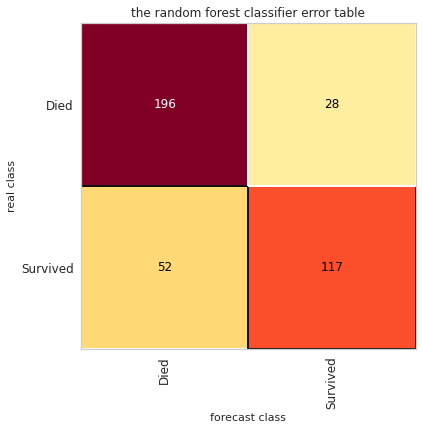

In [95]:
mapping = {0: "Died", 1: "Survived"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    rf3,
    classes=["Died", "Survived"],
    label_encoder=mapping
)
cm_viz.score(X_test, y_test)

cm_viz.ax.set(title='the random forest classifier error table', xlabel='forecast class', ylabel='real class')


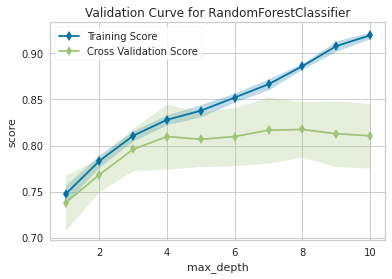

In [97]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from yellowbrick.model_selection import (
  ValidationCurve
)

fig, ax = plt.subplots(figsize=(6, 4))
vc_viz = ValidationCurve(
  RandomForestClassifier(n_estimators=100),
  param_name="max_depth",
  param_range=np.arange(1, 11),
  cv=10,
  n_jobs=-1,
)

vc_viz.fit(X, y)
vc_viz.poof()

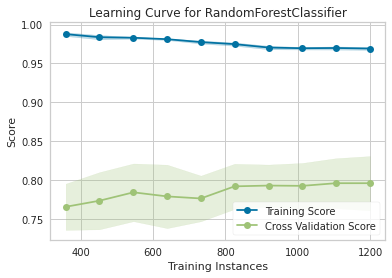

In [98]:
# learning curve

import numpy as np
fig, ax = plt.subplots(figsize=(6, 4))

cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(rf3, cv=cv, train_sizes=sizes,
  scoring="f1_weighted",
  n_jobs=4,
  ax=ax,
)

lc_viz.fit(X, y)
lc_viz.poof()

plt.show()

In [100]:
# model implementation

# with the pickle module you can save and load data models. To obtain classification or regression results 
# after creating the model, use the predick method as below
import pickle
pic = pickle.dumps(rf3)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)


0.7836538461538461